<a href="https://colab.research.google.com/github/mohamedbakrey12/Advanced-Data-Science/blob/master/classification_for_arabic_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
   In this project I work for classification model for Sentimental

### Project Pipeline

1.  Loading the library
2. Loading Dataset
3. Data pre-Processing
4. Applying the Model Machine Learning
5. Applying Lstm

# 1. Loading Library

In [ ]:
# Using this for working with dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


# Spliting the data
from sklearn.model_selection import train_test_split


# Using this library for transform the data into numeric
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Modeling machine learning
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



# For Metrics, to check the model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot


# Using this library for the LSTM model Deep learning.

from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
import keras.backend as K
from keras.callbacks import LearningRateScheduler




# Saving the Model
import pickle
# loading the model
from keras.models import load_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Read the dataset

In [ ]:
# Here read the read the data by using pandas library
df=pd.read_csv('/content/Last_Complete_Data_8224.csv')
# Show the first 10 rows
df.head(10)

,Review_ID,aspectCategory,sentiment,Pre_Text
0,1,seating,positive,seating copy comfortable perfect relaxing coff...
1,2,seating,negative,love alliance café seating bit cramped negativ...
2,3,seating,positive,seating arrangement wellspaced allowing privac...
3,4,seating,negative,honestly seating quite uncomfortable wish fash...
4,5,seating,positive,appreciate variety seating options high tools ...
5,6,seating,negative,café lovely seating feels bit crowded hard rel...
6,7,seating,positive,outdoor seating area charming especially sunny...
7,8,seating,negative,enjoy coming work seating isnt economic negati...
8,9,seating,positive,seating window offers nice view street outside...
9,10,seating,negative,chairs surprisingly uncomfortable copy café do...


###  Cheack the data

In [ ]:
# Check the nulls values
df.isna().sum()

Review_ID         0
aspectCategory    0
sentiment         0
Pre_Text          0
dtype: int64

In [ ]:
# check the information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8224 entries, 0 to 8223
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review_ID       8224 non-null   int64 
 1   aspectCategory  8224 non-null   object
 2   sentiment       8224 non-null   object
 3   Pre_Text        8224 non-null   object
dtypes: int64(1), object(3)
memory usage: 257.1+ KB


Text(0.5, 1.0, 'Sentiment Data Distribution')

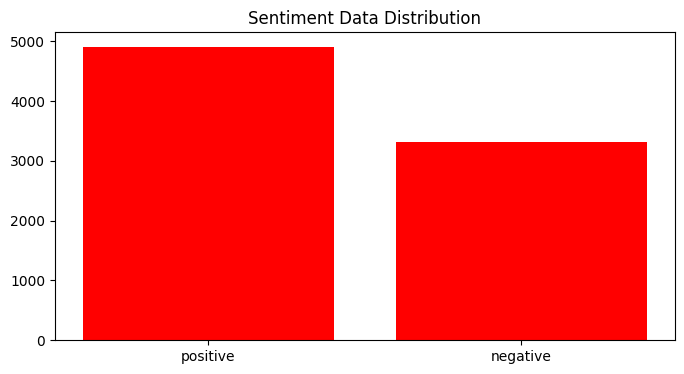

In [ ]:
# Check the label for the data
val_count = df.sentiment.value_counts()
# Figure size
plt.figure(figsize=(8,4))
# Using Bar plot to ploting the count of labeling data.
plt.bar(val_count.index, val_count.values, color='red')
# Set title for the plot.
plt.title("Sentiment Data Distribution")

# 3. Data Pre-processing

In [ ]:
"""
This function for processing the data,
here check the stopwords and steeming.
"""
def preprocess(text):
    text = text.split()
    # Check the stopwords.
    stop = set(stopwords.words('english'))
    # Check the Stemmer for the data
    stemmer = SnowballStemmer('english')
    text = [stemmer.stem(word) for word in text if not word in stop]
    return " ".join(text)


# Apply the function for the data.
df['Pre_Text'] = df['Pre_Text'].apply(preprocess)

In [ ]:
# Check the data after make processing on it.
df['Pre_Text']

0       seat copi comfort perfect relax coffe break de...
1            love allianc café seat bit cramp negat point
2       seat arrang wellspac allow privaci enjoy coffe...
3       honest seat quit uncomfort wish fashion chair ...
4       appreci varieti seat option high tool com armc...
                              ...                        
8219    pancak good dont blueberri pancak menu abl pro...
8220    waiter disappear entir food final abl order ar...
8221    90 powerhous steak 2 order mediumrar deliv wel...
8222                       food good writer pushyrud dumb
8223                       food good writer pushyrud dumb
Name: Pre_Text, Length: 8224, dtype: object

# 4. Apply the Tokenization on the data.
* Here we work on make transformation on the data to convert the data from text to numeric to make the model understand it.

In [ ]:
# Apply the tf-idf on the data.
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['Pre_Text'] )
print(vectors[:10])

  (0, 2138)	0.27776789123260337
  (0, 4462)	0.34450492643068337
  (0, 1667)	0.29961171689411364
  (0, 881)	0.43620670805261735
  (0, 1308)	0.2959524274395402
  (0, 4771)	0.33024268782980104
  (0, 4309)	0.27438756288828053
  (0, 1336)	0.28683601084729865
  (0, 1451)	0.3361615881111377
  (0, 5068)	0.23854090620786708
  (1, 4422)	0.3839550997589388
  (1, 3897)	0.40307684782146896
  (1, 1500)	0.4115850603328368
  (1, 775)	0.2950373999234985
  (1, 1004)	0.40150350996247947
  (1, 346)	0.3521187797464257
  (1, 3445)	0.2870795819589267
  (1, 5068)	0.25700353487178634
  (2, 534)	0.3434164952372105
  (2, 2025)	0.2255751246266688
  (2, 4540)	0.37459157203506915
  (2, 348)	0.31104537093160145
  (2, 6325)	0.45276255705585944
  (2, 507)	0.3434164952372105
  (2, 1004)	0.30605942131692115
  :	:
  (7, 3426)	0.2786433030863481
  (7, 5397)	0.3342949397162455
  (7, 1950)	0.44264805676543234
  (7, 3071)	0.36574947672889724
  (7, 6410)	0.29645784450738744
  (7, 1333)	0.26039144819155785
  (7, 2025)	0.262965

#### Convert the target columns from the text to numeric by using Label Encoding

In [ ]:
# Apply the Label encoding on the target columns.
le = LabelEncoder()
label=le.fit_transform(df['sentiment'])

#### Spliting the data into train and test to use it to train the model.

In [ ]:
# here apply the train_test-split function on the data.
X_train, X_test, y_train, y_test = train_test_split(vectors, label, test_size=0.2, random_state=42)

In [ ]:
print("Shape of the Train data set: ",X_train.shape)
print("Shape of the test data set:",X_test.shape)
print("Shape of the y_train data set",y_train.shape)
print("Shape of the y_test data set",y_test.shape)

Shape of the Train data set:  (6579, 6482)
Shape of the test data set: (1645, 6482)
Shape of the y_train data set (6579,)
Shape of the y_test data set (1645,)


# 5. Apply Model Machine Learning.

### Using Logistic Regression.

In [ ]:
# making LogisticRegression Model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
print('LogisticRegression Train Score is : ' , classifier.score(X_train, y_train))
print('LogisticRegression Test Score is : ' , classifier.score(X_test, y_test))

LogisticRegression Train Score is :  0.856969144246846
LogisticRegression Test Score is :  0.8097264437689969


##### Ckeck the model predicton

In [ ]:
#making predictions on test data
y_predict = classifier.predict(X_test)
print(y_predict)

[1 1 1 ... 1 1 1]


##### Check the Confusion Matrix

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_predict)

<Axes: title={'center': 'Confusion Matrix for the Model Logistic Regression'}>

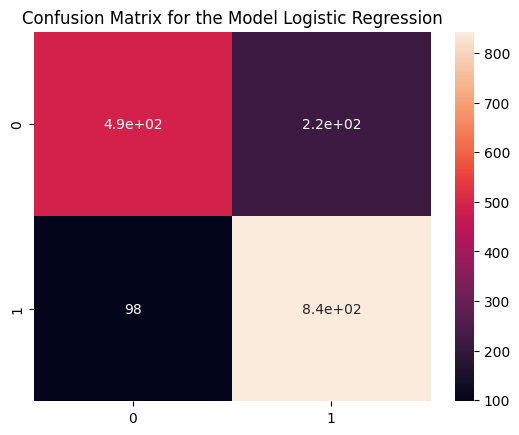

In [ ]:
# Ploting the confusion matrix
plt.title("Confusion Matrix for the Model Logistic Regression")
sns.heatmap(cm, annot=True)

#### Check the the Sensitivity and Specificity

In [ ]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8330494037478705
Specificity :  0.7967863894139886


#### Check the the PPV nad NPV

In [ ]:
total=sum(sum(cm))

# this for Positive Predictive Value.
ppv = cm[0,0]/(cm[0,0]+cm[0,1])
print('ppv : ', ppv )
# negative Predictive Value.
npv = cm[1,1]/(cm[1,0]+cm[1,1])
print('npv : ', npv)

ppv :  0.6946022727272727
npv :  0.895855472901169


#### Check the metrics

In [ ]:
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
F1Score = f1_score(y_test, y_predict, average='micro')
print('F1 Score is : ', F1Score)

F1 Score is :  0.8097264437689969


In [ ]:
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2
RecallScore = recall_score(y_test, y_predict, average='micro')
print('Recall Score is : ', RecallScore)

Recall Score is :  0.8097264437689969


In [ ]:
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))
PrecisionScore = precision_score(y_test, y_predict, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.8097264437689969


In [ ]:
#Calculating Precision recall Score
PrecisionRecallScore = precision_recall_fscore_support(y_test, y_predict, average='micro')
print('Precision Recall Score is : ', PrecisionRecallScore)

Precision Recall Score is :  (0.8097264437689969, 0.8097264437689969, 0.8097264437689969, None)


In [ ]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_predict, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.19027355623100303


In [ ]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_predict, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)



#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test,y_predict)
print('Median Squared Error Value is : ', MdSEValue )

Mean Squared Error Value is :  0.19027355623100303
Median Squared Error Value is :  0.0


### Ploting the ROC Curve

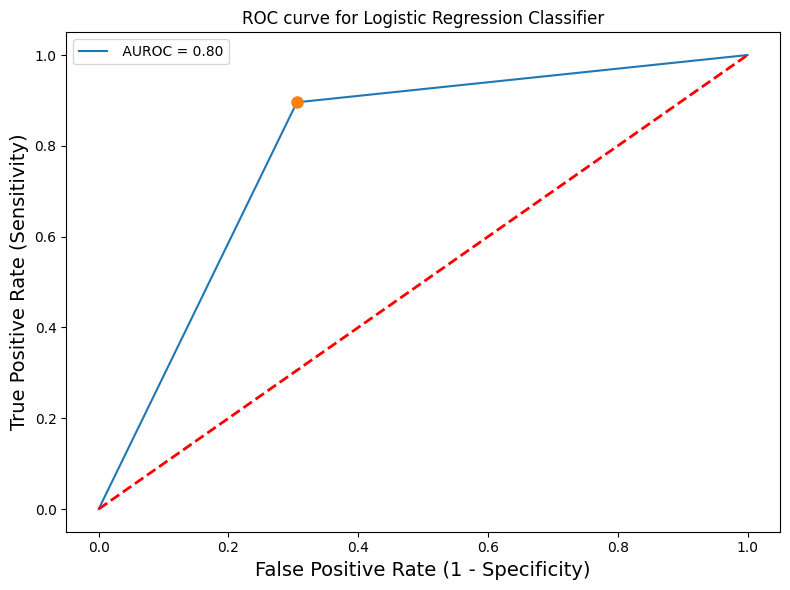

In [ ]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_predict)

roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))

ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)

ax2.set_xlabel("False Positive Rate", fontsize = 14)

ax2.set_ylabel("True Positive Rate", fontsize = 14)

ax2.set_title("ROC Curve", fontsize = 18)

ax2.legend(loc = 'best')

plt.title('ROC curve for Logistic Regression Classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))

ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)

plt.tight_layout()

In [ ]:
# Saving the model
pickle.dump(classifier, open("model.pkl", "wb"))

# Using LSTM

In [ ]:
x=df['Pre_Text']
# Encode target labels
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

In [ ]:
y = pd.get_dummies(df['sentiment'])

# spliting the Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#ngram_range=(1,2),    # unigram and bigram
                                                                preprocessor=lambda x: x,
                                                                tokenizer=lambda x: x)
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')




# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Set the max word that we will using it.
max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)


    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)

    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)

    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['Pre_Text'][0])
X, tokenizer = tokenize_pad_sequences(df['Pre_Text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 seat copi comfort perfect relax coffe break definit posit experi
After Tokenization & Padding 
 [  28  261   89   57  232   73 1076  117  304   67    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
y = pd.get_dummies(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (4934, 50) (4934, 2)
Validation Set -> (1645, 50) (1645, 2)
Test Set -> (1645, 50) (1645, 2)


In [ ]:

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

#### Build the Model LSTM

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Check the model Summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 25, 32)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                        

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
                                                         metrics=['accuracy', Precision(), Recall()])

##### Training the model

In [ ]:
history = model.fit(X_train, y_train,
                                        validation_data=(X_val, y_val),
                                        batch_size=16, epochs=epochs, verbose=1)

Epoch 1/20
309/309 [==============================] - 11s 23ms/step - loss: 0.6184 - accuracy: 0.6603 - precision: 0.6603 - recall: 0.6603 - val_loss: 0.5007 - val_accuracy: 0.7678 - val_precision: 0.7678 - val_recall: 0.7678
Epoch 2/20
309/309 [==============================] - 6s 20ms/step - loss: 0.4125 - accuracy: 0.8251 - precision: 0.8251 - recall: 0.8251 - val_loss: 0.4644 - val_accuracy: 0.7872 - val_precision: 0.7872 - val_recall: 0.7872
Epoch 3/20
309/309 [==============================] - 6s 19ms/step - loss: 0.3150 - accuracy: 0.8780 - precision: 0.8780 - recall: 0.8780 - val_loss: 0.5237 - val_accuracy: 0.7830 - val_precision: 0.7830 - val_recall: 0.7830
Epoch 4/20
309/309 [==============================] - 10s 33ms/step - loss: 0.2614 - accuracy: 0.9021 - precision: 0.9021 - recall: 0.9021 - val_loss: 0.5759 - val_accuracy: 0.7836 - val_precision: 0.7836 - val_recall: 0.7836
Epoch 5/20
309/309 [==============================] - 11s 35ms/step - loss: 0.2195 - accuracy: 0.9

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)


# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

Accuracy  : 0.7477
Precision : 0.7477
Recall    : 0.7477
F1 Score  : 0.7477


### Plot the curve for learning the model

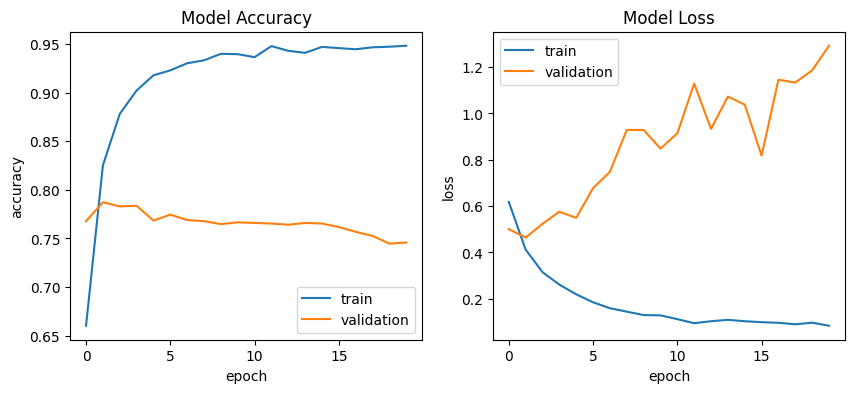

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')




    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')



 # Run the function
plot_training_hist(history)

In [ ]:
# Model Prediction
y_pred = model.predict(X_test)
print(y_pred[:10])

52/52 [==============================] - 1s 6ms/step
[[2.0429532e-07 9.9999970e-01]
 [4.7280735e-01 5.2719265e-01]
 [6.9741714e-07 9.9999923e-01]
 [2.5856622e-07 9.9999970e-01]
 [2.1103318e-07 9.9999970e-01]
 [9.9999756e-01 2.4289152e-06]
 [9.9999708e-01 2.8433167e-06]
 [2.2026504e-07 9.9999970e-01]
 [9.9999732e-01 2.6129098e-06]
 [1.2377751e-06 9.9999875e-01]]


52/52 [==============================] - 1s 10ms/step


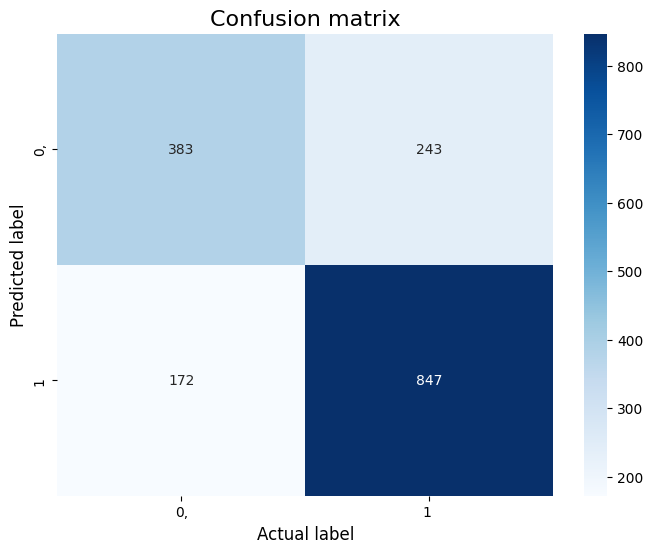

In [ ]:
# Plot the confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['0,' , '1 ']

    # use model to do the prediction
    y_pred = model.predict(X_test)

    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))

    # plot confusion matrix
    plt.figure(figsize=(8,6))

    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)

    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [ ]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Model Prediction.

In [ ]:
# Load model
model = load_model('/content/best_model.h5')

def predict_class(text):
    '''Function to predict kind of words class of the passed text'''

    sentiment_classes = [' 0'," 1  "]
    max_len=50

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted kind of word is', sentiment_classes[yt[0]])